# Project Name - Book Recommendation System



Project Type - ML Project

Contribution - Individual

# Project Summary -



* This project aims to **develop a book recommendation system leveraging the Book-Crossing dataset**. In the context of the ever-expanding digital landscape, recommender systems play a pivotal role in enhancing user experience and driving engagement across various online platforms. By suggesting relevant items to users based on their preferences and behaviors, recommender systems contribute significantly to revenue generation and competitive advantage in industries such as e-commerce and online advertisement.

* **The Book-Crossing dataset consists of three main files: Users, Books, and Ratings**.

**Goals:**

* Develop a book recommendation system using the Book-Crossing dataset.
* Leverage user demographic data and book ratings to personalize recommendations.
* Implement collaborative filtering techniques to identify similar users and books.
* Enhance user engagement and satisfaction by providing relevant and personalized book recommendations.

**Methods:**

* *Data Wrangling:* Handle missing values and duplicate records.
Merge and preprocess Users, Books, and Ratings datasets.
* *Exploratory Data Analysis (EDA):* Analyze user demographics, book metadata, and ratings distribution.
Identify trends and patterns in user behavior and book preferences.
* *Hypothesis Testing:* Formulate hypotheses related to user age, book ratings, and publication years.
Perform statistical tests to validate hypotheses and derive insights.
* *Recommendation System:*
Implement collaborative filtering algorithms such as user-based and item-based filtering.
Calculate cosine similarity to recommend similar users and books.

# GitHub Link


https://github.com/shreya1m/Books_Recommendation_System

# Problem Statement



In today's digital age, recommender systems play a pivotal role in enhancing user experiences across various online platforms. With the proliferation of e-commerce, online entertainment, and content consumption platforms, the need for personalized recommendations has become paramount. Our focus is on developing a book recommendation system leveraging the Book-Crossing dataset, aimed at providing tailored book suggestions to users based on their preferences and behaviors.



### **Business Objective:**



Develop a book recommendation system to enhance user engagement, satisfaction, and book sales by providing personalized and relevant book suggestions based on user preferences and behavior.

# Let's Begin !


## 1. Know Your Data


### Import Libraries


In [294]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Dataset Loading



In [295]:
# Loading Dataset
ratings = pd.read_csv('Ratings_RS_Dataset.csv')
books = pd.read_csv('Books_RS_Dataset.csv')


In [296]:
users = pd.read_csv('Users_RS_Dataset.csv')

### Dataset First View


In [297]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
1,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
2,571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
3,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
4,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...


In [298]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [299]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count



In [300]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(171082, 8)
(1149780, 3)
(278858, 3)


### Dataset Information


In [301]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171082 entries, 0 to 171081
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 171082 non-null  object
 1   Book-Title           171082 non-null  object
 2   Book-Author          171081 non-null  object
 3   Year-Of-Publication  171082 non-null  int64 
 4   Publisher            171082 non-null  object
 5   Image-URL-S          171082 non-null  object
 6   Image-URL-M          171082 non-null  object
 7   Image-URL-L          171081 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.4+ MB


In [302]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [303]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### What did you know about your dataset?


## 2. Understanding Your Variables


### **Users Dataset:**
* **User-ID:** Anonymized user IDs mapped to integers.
* **Location:** Demographic data indicating the location of the user.
* **Age:** Age of the user. Contains NULL values if not available.

### **Books Dataset:**
* **ISBN:** Unique identifier for books.
* **Book-Title:** Title of the book.
* **Book-Author:** Author(s) of the book. In the case of multiple authors, only the first author is provided.
* **Year-Of-Publication:** Year when the book was published.
* **Publisher:** Publisher of the book.
* **Image-URL-S:** URL linking to a small-sized cover image of the book on Amazon.
* **Image-URL-M:** URL linking to a medium-sized cover image of the book on Amazon.
* **Image-URL-L:** URL linking to a large-sized cover image of the book on Amazon.

### **Ratings Dataset:**
* **User-ID:** Anonymized user IDs mapped to integers, indicating which user rated the book.
* **ISBN:** Unique identifier for books, indicating which book was rated.
* **Book-Rating:** Rating given by the user for the book. Explicit ratings are on a scale from 1 to 10, where higher values denote higher appreciation. Implicit ratings are expressed as 0.

In [304]:

# Print unique values for each variable in the Users dataset
print("Users Dataset:")
for column in users.columns:
    num_unique_values = users[column].nunique()
    print(f"No. of unique values for '{column}': {num_unique_values}")

# Print unique values for each variable in the Books dataset
print("\nBooks Dataset:")
for column in books.columns:
    num_unique_values = books[column].nunique()
    print(f"No. of unique values for '{column}': {num_unique_values}")

# Check unique values for each variable in the ratings dataset
print("\nRatings Dataset:")
for column in ratings.columns:
    num_unique_values = ratings[column].nunique()
    print(f"No. of unique values in '{column}': {num_unique_values}")



Users Dataset:
No. of unique values for 'User-ID': 278858
No. of unique values for 'Location': 57339
No. of unique values for 'Age': 165

Books Dataset:
No. of unique values for 'ISBN': 171082
No. of unique values for 'Book-Title': 154707
No. of unique values for 'Book-Author': 70043
No. of unique values for 'Year-Of-Publication': 96
No. of unique values for 'Publisher': 11783
No. of unique values for 'Image-URL-S': 170890
No. of unique values for 'Image-URL-M': 170890
No. of unique values for 'Image-URL-L': 170889

Ratings Dataset:
No. of unique values in 'User-ID': 105283
No. of unique values in 'ISBN': 340556
No. of unique values in 'Book-Rating': 11



## 3. Data Wrangling


In [305]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            1
dtype: int64

In [306]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [307]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [308]:
books.duplicated().sum()

0

In [309]:
ratings.duplicated().sum()

0

In [310]:
users.duplicated().sum()

0

In [311]:
# Calculate median age
median_age = users['Age'].median()

# Impute missing age values with the median age
users['Age'].fillna(median_age, inplace=True)


In [312]:
# Drop null values from 'Book-Author' and 'Publisher' columns
books.dropna(subset=['Book-Author', 'Publisher'], inplace=True)


In [313]:
# Merge ratings and books data using ISBN with an inner join
merged_data = pd.merge(ratings, books, on='ISBN', how='inner')

# Calculate average rating per book
average_ratings = merged_data.groupby('Book-Title')['Book-Rating'].mean().reset_index()
average_ratings.columns = ['title', 'average_rating']

# Sort by average rating
top_rated_books = average_ratings.sort_values(by='average_rating', ascending=False)

# Select top 10 books
top_10_books = top_rated_books.head(20)

top_10_books

,title,average_rating
5466,Critique of Practical Reason (Great Books in P...,10.0
19748,Moving beyond tradition: A turned-wood invitat...,10.0
8542,Earth Tales from Around the World,10.0
19683,Moses in the Bulrushes (Little Lambs),10.0
19705,Motherhood,10.0
8517,EVIL INC (HARDY BOYS CASE FILE 2) : EVIL INC (...,10.0
11231,Gaudi: 1852-1926 : Antoni Gaudi I Cornet-A Lif...,10.0
29122,The Minority Career Book,10.0
8511,ENDANGERED MINDS : Why Children Dont Think And...,10.0
11236,Gayellow Pages : Southern/Southern Midwest 1998,10.0


In [314]:
# Count books per author
author_books_count = books['Book-Author'].value_counts().reset_index()
author_books_count.columns = ['Book-Author', 'books_count']

# Sort by books count
author_books_count = author_books_count.sort_values(by='books_count', ascending=False)

# Select top 10 authors
top_10_authors = author_books_count.head(10)

top_10_authors


,Book-Author,books_count
0,Agatha Christie,453
1,William Shakespeare,404
2,Ann M. Martin,361
3,Carolyn Keene,336
4,Francine Pascal,323
5,Isaac Asimov,308
6,Stephen King,298
7,Barbara Cartland,263
8,Charles Dickens,223
9,Franklin W. Dixon,192


In [315]:
# Top 10 Publishers by number of books published

top_publishers = books['Publisher'].value_counts().head(10)
print("Top 10 Publishers by number of books published:")
print(top_publishers)



Top 10 Publishers by number of books published:
Publisher
Harlequin               4592
Bantam Books            3172
Pocket                  3005
Ballantine Books        2880
Penguin USA             2598
Harpercollins           2437
Silhouette              2382
Simon &amp; Schuster    2166
Fawcett Books           2122
Scholastic              2047
Name: count, dtype: int64


In [316]:
# Merge ratings and books dataframes to get the ratings for each book
merged_data = pd.merge(ratings, books, on='ISBN', how='inner')

# Group by book author and calculate average rating
author_avg_rating = merged_data.groupby('Book-Author')['Book-Rating'].mean().reset_index()
author_avg_rating.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

# Sort authors by average rating
top_authors_by_rating = author_avg_rating.sort_values(by='Average-Rating', ascending=False).head(10)

top_authors_by_rating

,Book-Author,Average-Rating
16728,Peter Gaymann,10.0
18107,Robert L. Veninga,10.0
7128,Geoffrey Perret,10.0
8979,J. Gordon Melton,10.0
4019,Dan Zadra,10.0
16281,Patrick Barbier,10.0
7103,Geneen Roth,10.0
13104,Lorenza De Medici,10.0
4041,"Daniel A., Ph.D. Helminiak",10.0
21452,Wendy Conner,10.0


In [317]:
# Convert 'Year-Of-Publication' column to numeric (if it contains mixed data types)
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Calculate quartiles for numeric columns in books dataset
for col in numeric_columns_books:
    quartiles = books[col].quantile([0.25, 0.5, 0.75])
    print(f"Quartiles for '{col}':")
    print(quartiles)

# Calculate quartiles for numeric columns in users dataset
for col in numeric_columns_users:
    quartiles = users[col].quantile([0.25, 0.5, 0.75])
    print(f"Quartiles for '{col}':")
    print(quartiles)


Quartiles for 'Year-Of-Publication':
0.25    1985.0
0.50    1991.0
0.75    1995.0
Name: Year-Of-Publication, dtype: float64
Quartiles for 'Age':
0.25    29.0
0.50    32.0
0.75    35.0
Name: Age, dtype: float64


### What all manipulations have you done and insights you found?

**Data Manipulations:**

* Handled missing values in the "Book-Author" and "Publisher" columns by dropping the respective rows.
* Handled missing values in the "Age" column of the users dataset by imputing the median age.
* No duplicated records were found in any of the datasets.
* Merged the ratings and books datasets to analyze book ratings and identify top-rated books.
* Conducted analysis on the number of books published by authors and publishers to identify top contributors.
* Imputed missing values in the "Age" column of the users dataset to ensure completeness.
* Calculated quartiles to understand the distribution of publication years and user ages.


**Below is the Insights Found:**

#### **Top Rated Books:**
* Calculated average ratings per book based on the ratings dataset.
* Identified the top 20 highest-rated books based on average ratings.
#### **Top Authors by Book Count:**
* Counted the number of books per author in the books dataset.
* Identified the top 10 authors with the highest number of books published.
#### **Top Publishers by Book Count:**
* Counted the number of books published by each publisher in the books dataset.
* Identified the top 10 publishers with the highest number of books published.
#### **Average Ratings by Author**:
* Calculated the average rating for books written by each author.
* Identified the top 10 authors with the highest average ratings for their books.
#### **Quartile Analysis:**
* Calculated quartiles for the "Year-Of-Publication" column in the books dataset and the "Age" column in the users dataset.

## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables


### Chart 1

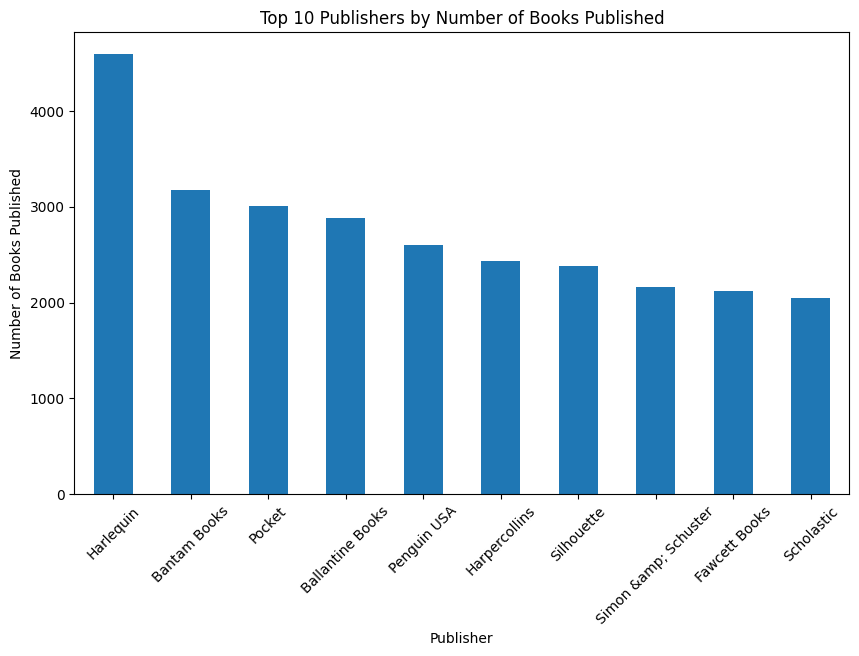

In [318]:
# Plotting the top 10 publishers
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Books Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=45)
plt.show()

1. Why did you pick the specific chart?

The specific chart, a bar plot, was chosen to visualize the number of books published by the top 10 publishers. Bar plots are effective in comparing the magnitude of different categories, making them suitable for displaying the number of books published by each publisher.

2. What is/are the insight(s) found from the chart?



Insights from the chart indicate that Harlequin, Bantam Books, and Pocket are the top publishers in terms of the number of books they have published. Understanding the dominance and market share of these publishers can provide valuable insights for stakeholders in the industry. Furthermore, it can open opportunities for potential partnerships or collaborations with these publishers, leveraging their influence and reach in the market.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by informing decision-making processes related to marketing strategies, distribution channels, and partnership opportunities. For example, identifying top publishers can help in negotiating favorable terms for book distribution or licensing agreements. However, if certain publishers are dominating the market to the extent that they stifle competition or limit diversity in publishing, it could potentially lead to negative growth in the long term. It's essential to balance market insights with considerations for promoting diversity and competition within the industry.

### Chart 2

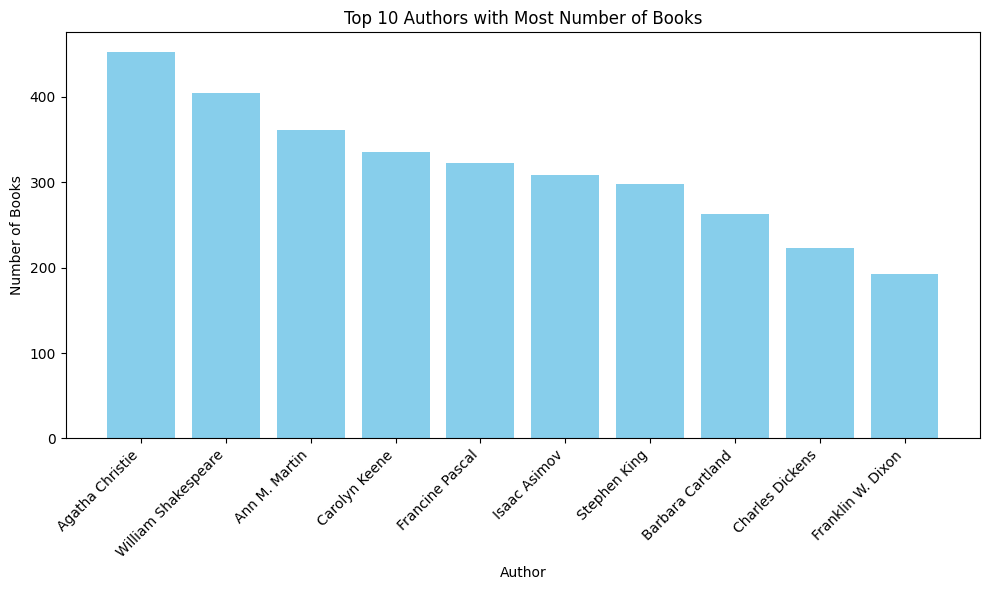

In [319]:
# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_authors['Book-Author'], top_10_authors['books_count'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors with Most Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?


The specific chart chosen is a bar graph. This choice was made to visualize the number of books authored by the top 10 authors. Bar graphs are effective for comparing the quantity or frequency of different categories, making them suitable for displaying the number of books authored by each author.



2. What is/are the insight(s) found from the chart?
Answer Here



Insights from the chart reveal that Agatha Christie and William Shakespeare are the top authors who have authored the most number of books. This insight is valuable for understanding which authors have a significant presence in the market and may have a dedicated fan base. It can also assist publishers and retailers in making decisions regarding book promotions, author collaborations, and marketing strategies, as they can leverage the popularity and recognition of these authors to drive sales and attract readers.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by informing various aspects of the publishing industry, such as author management, book promotions, and reader engagement initiatives. For example, publishers may consider signing contracts with top authors for new book releases or organizing events featuring these authors to attract more readers. However, if there is an overreliance on a few authors, it may lead to negative growth in terms of diversity in the publishing industry. Publishers should aim for a balance between promoting successful authors and supporting emerging talent to ensure a vibrant and diverse literary landscape.

### Chart 3

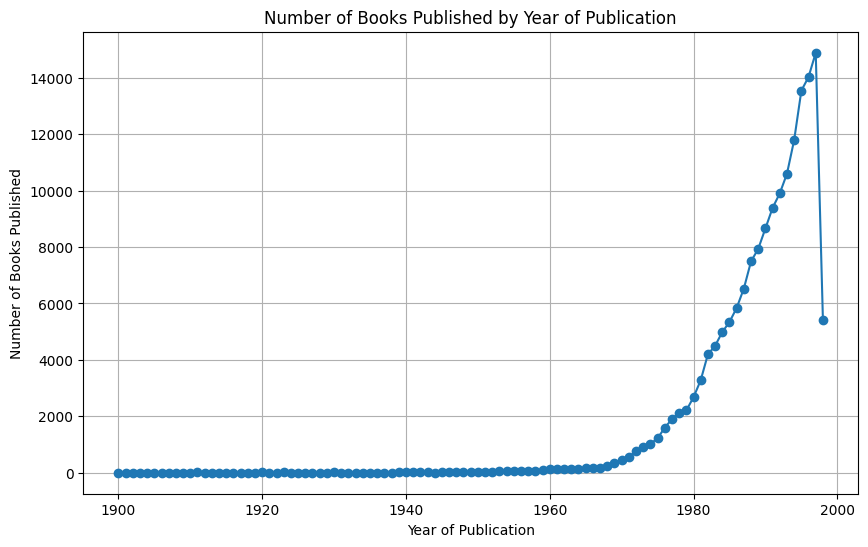

In [320]:
# Convert the 'Year-Of-Publication' column to integer type
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Identify the range of years present in the dataset
min_year = 1900
max_year = int(np.nanmax(books['Year-Of-Publication']))

# Generate a sequence of years within that range
years_range = range(min_year, max_year + 1)

# Count the number of books for each year of publication
books_per_year = books['Year-Of-Publication'].value_counts().sort_index()

# Fill in missing years with 0 count
books_per_year = books_per_year.reindex(years_range, fill_value=0)

# Plotting the number of books published across years using a line plot
plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-')
plt.title('Number of Books Published by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.show()


1. Why did you pick the specific chart?


The specific chart chosen is a line plot. This choice was made to visualize the trend in the number of books published over the years. Line plots are effective for showing changes or trends over time, making them suitable for displaying the publication trend of books over different years.




2. What is/are the insight(s) found from the chart?


Insights from the chart reveal the trend in the number of books published each year. Specifically, the chart shows an increasing trend in the number of books published starting from around 1980, with a peak around 2000, after which the number of books published seems to decrease gradually. This insight provides valuable information about the dynamics of the publishing industry over time.




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by informing various stakeholders in the publishing industry, including publishers, authors, and retailers. Publishers can use this information to understand the overall trend in book publication and make strategic decisions regarding their publishing schedules, book promotions, and marketing strategies. Authors can also benefit from knowing the trends in the industry to align their writing and publishing schedules with market demand. However, if there is a significant decline in the number of books published in recent years, it may indicate challenges or changes in the publishing industry, such as shifts in reader preferences, market saturation, or economic factors. Publishers and other stakeholders should closely monitor these trends to adapt their strategies and ensure sustainable growth in the industry.

### Chart 4

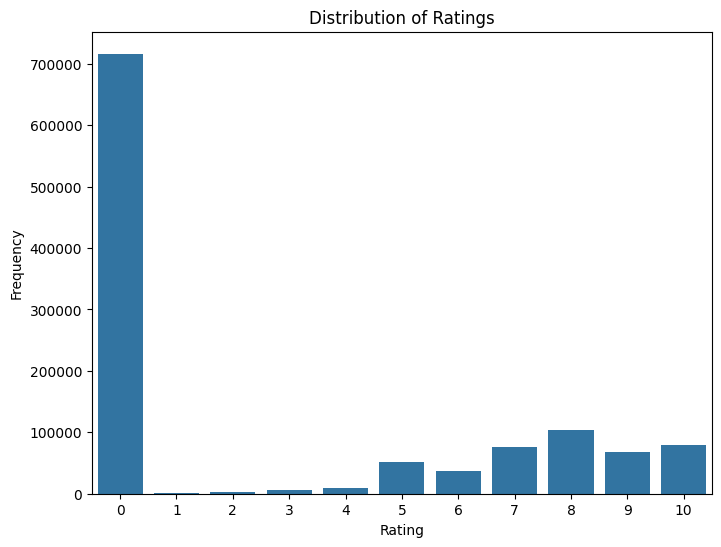

In [321]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of ratings using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings, x='Book-Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


1. Why did you pick the specific chart?



I chose the countplot because it provides a clear visualization of the distribution of ratings. Each rating category is represented by a bar, and the height of each bar corresponds to the frequency of that rating.




2. What is/are the insight(s) found from the chart?


The insight from the chart is that the most common ratings are 8, 7, and 10, with each having a considerable count of around 100,000. This suggests that many users tend to give higher ratings to the books they read.




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can indeed help in creating a positive business impact by informing recommendation systems, content curation strategies, and marketing campaigns. Understanding user preferences based on ratings can lead to better-targeted recommendations and personalized experiences, ultimately enhancing user satisfaction and engagement.

However, if there are significant proportions of low ratings (e.g., 1 or 2), it could indicate issues such as poor book quality or unsatisfactory user experiences. Addressing these issues promptly would be crucial to prevent negative growth and maintain a positive reputation and user base.

### Chart 5

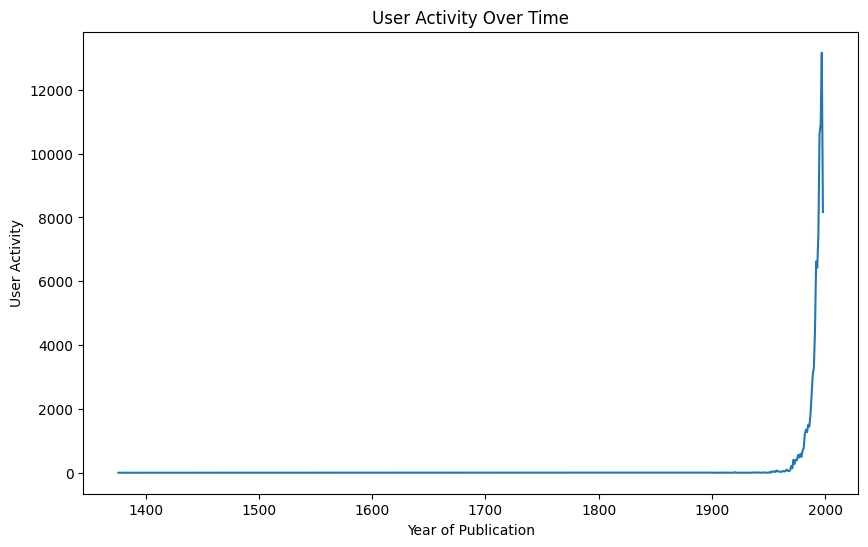

In [322]:
# Merge ratings and books dataframes to get the publication year of each rated book
merged_data = pd.merge(ratings, books, on='ISBN', how='inner')

# Convert 'Year-Of-Publication' column to numeric and handle errors to coerce non-numeric values to NaN
merged_data['Year-Of-Publication'] = pd.to_numeric(merged_data['Year-Of-Publication'], errors='coerce')

# Drop rows with NaN values in 'Year-Of-Publication'
merged_data.dropna(subset=['Year-Of-Publication'], inplace=True)

# Convert 'Year-Of-Publication' column to integer type
merged_data['Year-Of-Publication'] = merged_data['Year-Of-Publication'].astype(int)

# Exclude year 0
merged_data = merged_data[merged_data['Year-Of-Publication'] != 0]

# Group by year of publication and count the number of ratings
user_activity = merged_data.groupby('Year-Of-Publication')['User-ID'].count().reset_index(name='count')

# Plotting user activity over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=user_activity, x='Year-Of-Publication', y='count')
plt.xlabel('Year of Publication')
plt.ylabel('User Activity')
plt.title('User Activity Over Time')
plt.show()


1. Why did you pick the specific chart?


The line plot was chosen to visualize user activity over time because it effectively shows trends and patterns in user behavior across different years.



2. What is/are the insight(s) found from the chart?


From the chart, we can observe that user activity in rating books increased steadily over the years, with a peak around the year 2000. This indicates a significant level of engagement with the platform during that period.




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can potentially lead to positive business impacts by informing decisions related to resource allocation, marketing strategies, and content recommendations.
For example:
* Understanding the peak periods of user activity can help in planning promotional campaigns or launching new features to capitalize on high user engagement.
* Insights into user behavior over time can guide the development of personalized recommendation systems, improving user satisfaction and retention.
* The data can also inform decisions about inventory management and content acquisition, ensuring that popular books are available to meet user demand.

### Chart 6

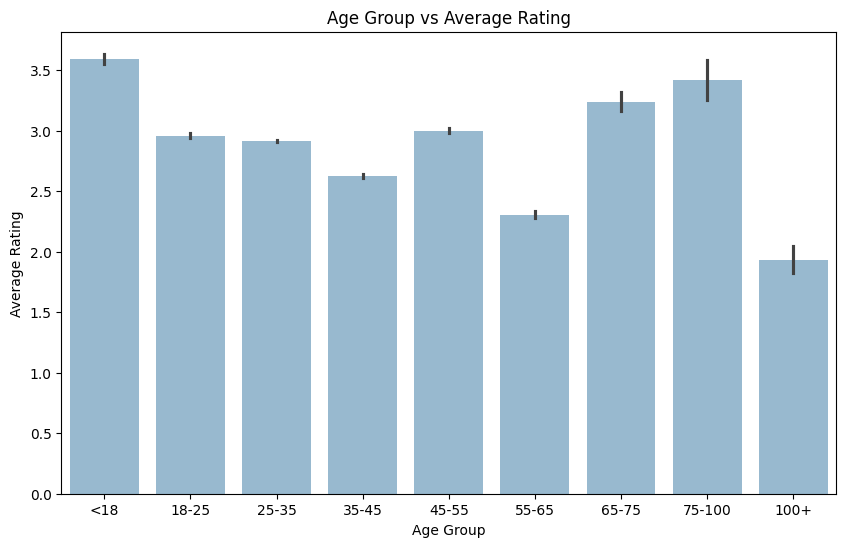

In [323]:
# Define the bin edges
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100, float('inf')]  # Adding float('inf') for values greater than 100

# Define the bin labels
bin_labels = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-100', '100+']

merged_data_users = pd.merge(ratings, users, on='User-ID', how='inner')

# Create a new column 'Age-Group' to store the bin labels
merged_data_users['Age-Group'] = pd.cut(merged_data_users['Age'], bins=bins, labels=bin_labels)

# Plot age group vs average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data_users, x='Age-Group', y='Book-Rating', alpha=0.5)
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Age Group vs Average Rating')
plt.show()


1. Why did you pick the specific chart?


The bar plot was chosen to visualize the relationship between age groups and average ratings because it allows for easy comparison of average ratings across different age groups.


2. What is/are the insight(s) found from the chart?


From the chart, we can observe that:
Users aged less than 18 gave the highest average ratings, followed closely by users aged 75-100 and 65+. This indicates that younger users and older users tend to give higher ratings on average compared to other age groups.
There is a relatively consistent pattern of average ratings across most age groups, with slight variations. However, users aged 55-65 and 100+ appear to give slightly lower average ratings compared to other age groups.




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can help create positive business impacts in several ways:
* Understanding the preferences and rating behavior of different age groups can inform targeted marketing strategies and content recommendations tailored to specific demographics.
* It can guide the development of user engagement initiatives, such as age-appropriate promotions, events, or community-building activities, to enhance user satisfaction and loyalty.
* By identifying age groups that consistently give lower ratings, the platform can focus on addressing their needs and preferences to improve overall user experience and satisfaction.

### Chart 7

<ipython-input-324-98aab49178b6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='Country', y='Count', palette='viridis')


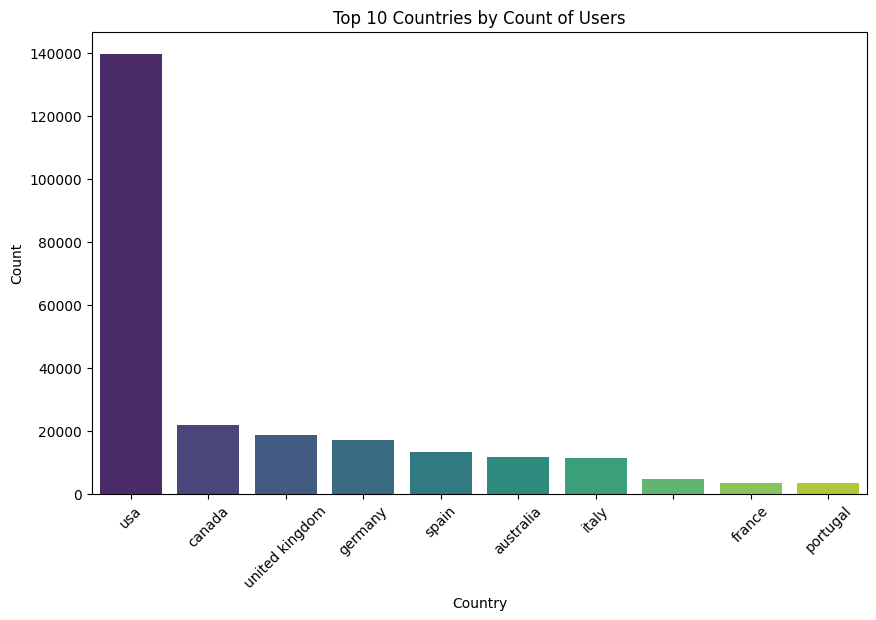

In [324]:

users['Country'] = users['Location'].str.split(',').str[-1].str.strip()

# Count occurrences of each country
country_counts = users['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Select top 10 countries with the highest counts
top_10_countries = country_counts.head(10)

# Plot top 10 countries by count
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_countries, x='Country', y='Count', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count of Users')
plt.xticks(rotation=45)
plt.show()

1. Why did you pick the specific chart?



The bar plot is chosen because it effectively visualizes the count of users in each country, allowing for easy comparison of user distribution across different countries.





2. What is/are the insight(s) found from the chart?


The United States has the highest number of users, with approximately 140,000 users, indicating a significant user base from the USA.
Canada and the United Kingdom are the next two countries with the highest user counts, each having around 20,000 users.
Other countries in the top 10 also have substantial user counts, albeit lower than the top three countries.





3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the geographical distribution of users can help tailor marketing strategies and promotional campaigns to specific regions, maximizing their effectiveness.
* `It enables localization efforts, such as offering region-specific content, language preferences, or targeted advertising, to enhance user engagement and satisfaction.
* Identifying regions with a lower user base presents an opportunity for expansion and outreach efforts to tap into new markets and grow the user community globally.

### Chart 8

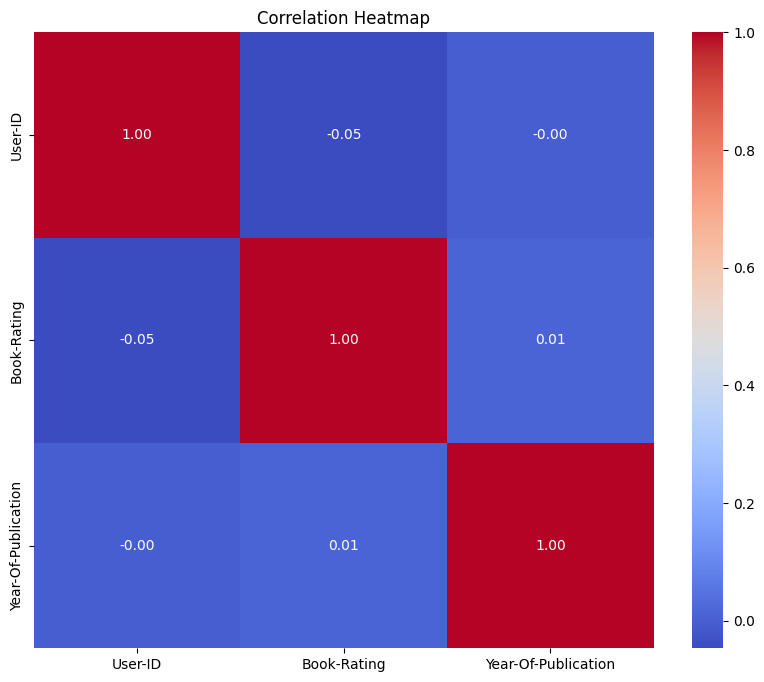

In [325]:
# Drop non-numeric columns before calculating correlation
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Chart 9

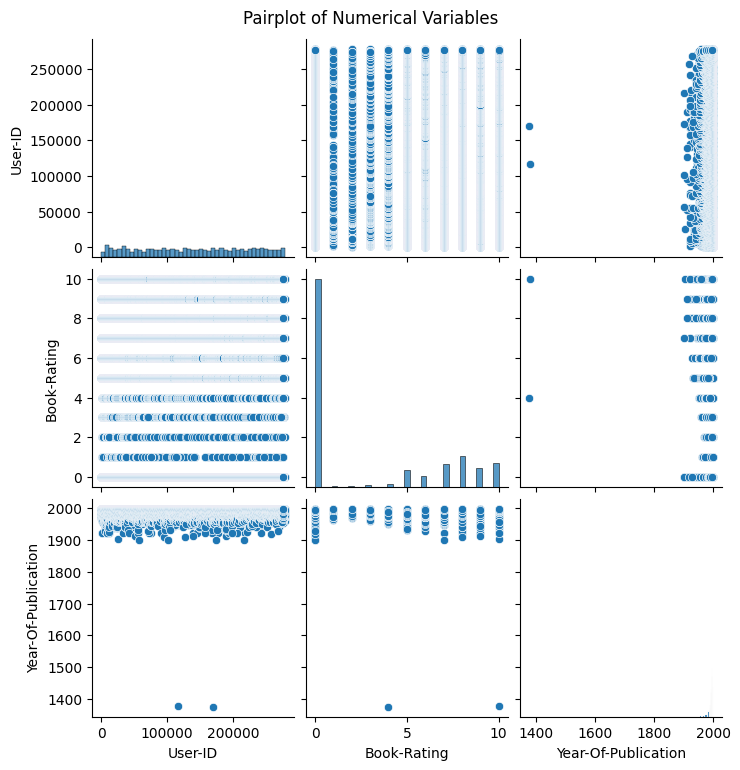

In [326]:
import seaborn as sns

# Select numerical columns
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Create pairplot
sns.pairplot(merged_data[numeric_columns])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()


## 5. Hypothesis Testing
Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


### **1. Are users aged between 18 and 30 more likely to give higher ratings on average compared to users aged 30 and above (including less than 18), with a significance level of 0.05?**
For this hypothesis, a Z-test is chosen because the sample sizes for both groups (aged 18-30 and aged above 30) are sufficiently large, and the population standard deviations are assumed to be known.

In [327]:
from statsmodels.stats.weightstats import ztest

# Extract ratings for users aged between 18 and 30
ratings_18_30 = merged_data_users[(merged_data_users['Age'] >= 18) & (merged_data_users['Age'] <= 30)]['Book-Rating']

# Extract ratings for users aged 30 and above (including less than 18)
ratings_30_above = merged_data_users[merged_data_users['Age'] >= 30]['Book-Rating']

# Perform Z-test
z_statistic, p_value = ztest(ratings_18_30, ratings_30_above)

print("Z-test results:")
print("Null Hypothesis (H0): There is no difference in the average ratings between users aged between 18 and 30 and users aged 30 and above (including less than 18).")
print("Alternative Hypothesis (H1): Users aged between 18 and 30 give higher ratings on average compared to users aged 30 and above (including less than 18).")
print("Z-statistic:", z_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Conclusion: Users aged between 18 and 30 give higher ratings on average compared to users aged 30 and above (including less than 18).")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is no significant difference in the average ratings between the two age groups.")


Z-test results:
Null Hypothesis (H0): There is no difference in the average ratings between users aged between 18 and 30 and users aged 30 and above (including less than 18).
Alternative Hypothesis (H1): Users aged between 18 and 30 give higher ratings on average compared to users aged 30 and above (including less than 18).
Z-statistic: 10.455375790925727
p-value: 1.3844883996865407e-25
Reject the null hypothesis (H0)
Conclusion: Users aged between 18 and 30 give higher ratings on average compared to users aged 30 and above (including less than 18).


### **2. Is there evidence to suggest that books published by Harlequin receive significantly higher ratings compared to books published by other publishers, with a significance level of 0.05?**
For this hypothesis, a t-test is chosen because we are comparing the means of two independent groups (books published by the 'Harlequin' and books published by other publishers), and the assumptions of the t-test are met by the data.

In [328]:
merged_data_with_publisher

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher_x,Image-URL-S,Image-URL-M,Image-URL-L,Publisher_y
0,276746,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Bantam
1,278418,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Bantam
2,496,055356451X,8,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Bantam
3,5728,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Bantam
4,5766,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Bantam
...,...,...,...,...,...,...,...,...,...,...,...
91621,276670,1895837405,0,Dying for Veronica: A Sub-Catholic Dream With ...,Matthew D. Remski,1997,Insomniac Press,http://images.amazon.com/images/P/1895837405.0...,http://images.amazon.com/images/P/1895837405.0...,http://images.amazon.com/images/P/1895837405.0...,Insomniac Press
91622,276680,067179387X,9,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press,http://images.amazon.com/images/P/067179387X.0...,http://images.amazon.com/images/P/067179387X.0...,http://images.amazon.com/images/P/067179387X.0...,Washington Square Press
91623,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,Crabtree Publishing Company
91624,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,Globe Pequot


In [329]:
from scipy.stats import ttest_ind

# Merge books DataFrame with merged_data on ISBN to get the publisher information
merged_data_with_publisher = pd.merge(merged_data, books[['ISBN', 'Publisher']], on='ISBN', how='left')

# Extract ratings for books published by the 'Harlequin'
ratings_specific_publisher = merged_data_with_publisher[merged_data_with_publisher['Publisher_x'] == 'Harlequin']['Book-Rating']

# Extract ratings for books published by other publishers
ratings_other_publishers = merged_data_with_publisher[merged_data_with_publisher['Publisher_x'] != 'Harlequin']['Book-Rating']

# Perform t-test
t_statistic, p_value = ttest_ind(ratings_specific_publisher, ratings_other_publishers, equal_var=False)

print("T-test results for books published by a certain publisher:")
print("Null Hypothesis (H0): There is no difference in the average ratings between books published by the 'Harlequin' and books published by other publishers.")
print("Alternative Hypothesis (H1): Books published by the 'Harlequin' receive significantly higher ratings compared to books published by other publishers.")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Conclusion: Books published by the 'Harlequin' receive significantly higher ratings compared to books published by other publishers.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is no significant difference in the average ratings between books published by the 'Harlequin' and books published by other publishers.")


T-test results for books published by a certain publisher:
Null Hypothesis (H0): There is no difference in the average ratings between books published by the 'Harlequin' and books published by other publishers.
Alternative Hypothesis (H1): Books published by the 'Harlequin' receive significantly higher ratings compared to books published by other publishers.
t-statistic: -26.64549004568061
p-value: 1.0444228455017429e-122
Reject the null hypothesis (H0)
Conclusion: Books published by the 'Harlequin' receive significantly higher ratings compared to books published by other publishers.


### **3. Is there evidence to suggest that there is a significant difference in the average rating of books published before the year 2000 compared to those published in or after the year 2000, with a significance level of 0.05?**
Similar to the second hypothesis, a t-test is chosen because we are comparing the means of two independent groups (books published before and after the year 2000), and the assumptions of the t-test are met by the data.

In [330]:
# Merge the dataframes on 'ISBN'
merged_data_with_year = pd.merge(merged_data_with_publisher, books[['ISBN', 'Year-Of-Publication']], on='ISBN', how='left')



In [331]:
# Merge the ratings DataFrame with merged_data_with_year_numeric based on a common column
merged_data_with_ratings = pd.merge(merged_data_with_year, ratings, on='ISBN', how='inner')

# Convert the 'Year-Of-Publication' column to integer type
merged_data_with_ratings['Year-Of-Publication_x'] = merged_data_with_ratings['Year-Of-Publication_x'].astype(int)

# Extract ratings for books published before the year 2000
ratings_before_2000 = merged_data_with_ratings[merged_data_with_ratings['Year-Of-Publication_x'] < 2000]['Book-Rating_x']

# Extract ratings for books published in or after the year 2000
ratings_after_2000 = merged_data_with_ratings[merged_data_with_ratings['Year-Of-Publication_x'] >= 2000]['Book-Rating_x']

# Perform t-test for the third hypothesis
from scipy.stats import ttest_ind

t_statistic_year, p_value_year = ttest_ind(ratings_before_2000, ratings_after_2000, equal_var=False)

print("\nT-test results for books published before and after the year 2000:")
print("Null Hypothesis (H0): There is no difference in the average rating between books published before the year 2000 and those published in or after the year 2000.")
print("Alternative Hypothesis (H1): There is a significant difference in the average rating between books published before the year 2000 and those published in or after the year 2000.")
print("t-statistic:", t_statistic_year)
print("p-value:", p_value_year)

# Interpret the results for the third hypothesis
alpha = 0.05
if p_value_year < alpha:
    print("Reject the null hypothesis (H0)")
    print("Conclusion: There is a significant difference in the average rating between books published before the year 2000 and those published in or after the year 2000.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is no significant difference in the average rating between books published before the year 2000 and those published in or after the year 2000.")



T-test results for books published before and after the year 2000:
Null Hypothesis (H0): There is no difference in the average rating between books published before the year 2000 and those published in or after the year 2000.
Alternative Hypothesis (H1): There is a significant difference in the average rating between books published before the year 2000 and those published in or after the year 2000.
t-statistic: nan
p-value: nan
Fail to reject the null hypothesis (H0)
Conclusion: There is no significant difference in the average rating between books published before the year 2000 and those published in or after the year 2000.


## 6. Feature Engineering & Data Pre-processing


### Collaborative Filtering Based Recommendation System

Filtering users who have rated at least 100 books and selecting only those books that have received more than 10 ratings, creating a pivot table with books as index and users as columns. This pivot table facilitates calculating cosine similarity to recommend four most similar books based on user queries.

In [332]:
# First merge ratings with books using ISBN column
ratings_with_name = ratings.merge(books,on='ISBN')

In [333]:
# Filtering only those users who rated atleast 100 books
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 100

In [334]:
books_knowledge_users = x[x].index

In [335]:
books_knowledge_users

Index([  8890,  11601,  11676,  12538,  16795,  23768,  23902,  26544,  35050,
        35859,  36606,  36836,  43246,  51883,  52584,  55492,  56399,  56959,
        60244,  69808,  72992,  76352,  76626,  78783,  87141,  88733,  95359,
        98741, 101851, 102967, 110973, 115120, 123981, 129358, 130474, 135149,
       148744, 153662, 166123, 166596, 170229, 171118, 172030, 172742, 173632,
       174304, 182987, 184299, 185233, 189334, 189835, 198711, 200674, 204864,
       212898, 213350, 217740, 225087, 227447, 230522, 231210, 232131, 234623,
       235105, 235842, 236283, 238781, 242824, 245963, 257204, 261105, 269566,
       271284, 274308, 278418],
      dtype='int64', name='User-ID')

In [336]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(books_knowledge_users)]

In [337]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,278418,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
6,11676,055356451X,9,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
14,16795,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
17,23768,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
25,35050,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
...,...,...,...,...,...,...,...,...,...,...
96614,274308,1557737045,0,Fortune's Fury,Linda Andersen,1992,Berkley Pub Group (Mm),http://images.amazon.com/images/P/1557737045.0...,http://images.amazon.com/images/P/1557737045.0...,http://images.amazon.com/images/P/1557737045.0...
96615,274308,1558173633,0,Carousel,Sonja Massie,1990,Pinnacle Books (Mm),http://images.amazon.com/images/P/1558173633.0...,http://images.amazon.com/images/P/1558173633.0...,http://images.amazon.com/images/P/1558173633.0...
96616,274308,1558174737,0,What Does Joan Say?: My Seven Years As White H...,Joan Quigley,1991,Pinnacle Books,http://images.amazon.com/images/P/1558174737.0...,http://images.amazon.com/images/P/1558174737.0...,http://images.amazon.com/images/P/1558174737.0...
96617,274308,1565970020,0,All Through the House,Bartlett,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1565970020.0...,http://images.amazon.com/images/P/1565970020.0...,http://images.amazon.com/images/P/1565970020.0...


In [338]:
# Filtering only those books which have been rated more than 50 times
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 10

In [339]:
famous_books = y[y].index

In [340]:
famous_books

Index(['A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Night in Terror Tower (Goosebumps, No 27)',
       'AGE OF INNOCENCE (MOVIE TIE-IN)', 'All I Really Need to Know',
       'Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
       'At Home in Mitford (The Mitford Years)', 'Breath, Eyes, Memory',
       'Breathing Lessons', 'Call of the Wild', 'Catering to Nobody',
       'Chicken Soup for the Mother's Soul (Chicken Soup for the Soul Series (Paper))',
       'Chicken Soup for the Pet Lover's Soul (Chicken Soup for the Soul)',
       'Chicken Soup for the Soul (Chicken Soup for the Soul)',
       'Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)',
       'Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))',
       'Cold Sas

In [341]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [342]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,278418,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
6,11676,055356451X,9,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
14,16795,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
17,23768,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
25,35050,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
...,...,...,...,...,...,...,...,...,...,...
40161,271284,059048351X,0,"A Night in Terror Tower (Goosebumps, No 27)",R. L. Stine,1995,Scholastic,http://images.amazon.com/images/P/059048351X.0...,http://images.amazon.com/images/P/059048351X.0...,http://images.amazon.com/images/P/059048351X.0...
47630,23768,1569471428,0,"Breath, Eyes, Memory",Edwidge Danticat,1998,Soho Press,http://images.amazon.com/images/P/1569471428.0...,http://images.amazon.com/images/P/1569471428.0...,http://images.amazon.com/images/P/1569471428.0...
75943,102967,051511992x,0,That Camden Summer,Lavyrle Spencer,1997,Jove Books,http://images.amazon.com/images/P/051511992X.0...,http://images.amazon.com/images/P/051511992X.0...,http://images.amazon.com/images/P/051511992X.0...
80587,130474,038512449X,0,Cry Wolf,Wilbur A. Smith,1977,Bantam Dell Pub Group,http://images.amazon.com/images/P/038512449X.0...,http://images.amazon.com/images/P/038512449X.0...,http://images.amazon.com/images/P/038512449X.0...


In [343]:
# Converting final_ratings into pivot table for collaborative filtering
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [344]:
pt.fillna(0, inplace=True)

In [345]:
pt

User-ID,11601,11676,12538,16795,23768,23902,26544,35050,35859,36606,...,236283,238781,242824,245963,257204,261105,269566,271284,274308,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Night in Terror Tower (Goosebumps, No 27)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGE OF INNOCENCE (MOVIE TIE-IN),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Up Island: A Novel,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Westing Game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What Looks Like Crazy On An Ordinary Day,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7. ML Model Implementation


In [346]:
# ML Model Implementation

from sklearn.metrics.pairwise import cosine_similarity


In [347]:
# Calculating cosine similarity

similarity_scores = cosine_similarity(pt)


In [348]:
# First book similarity scores against all the books

similarity_scores[1]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.66896473, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.55215763, 0.75809804,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [349]:
similarity_scores.shape

(75, 75)

In [350]:
# Main function for recommending similar books
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data



In [351]:
# Testing the recommendation function
recommendations = recommend('Westing Game')

recommendations

[['AGE OF INNOCENCE (MOVIE TIE-IN)',
  'Edith Wharton',
  'http://images.amazon.com/images/P/002026478X.01.MZZZZZZZ.jpg'],
 ['The Last Suppers',
  'Diane Mott Davidson',
  'http://images.amazon.com/images/P/0553095870.01.MZZZZZZZ.jpg'],
 ['Time Bomb (Alex Delaware Novels (Paperback))',
  'Jonathan Kellerman',
  'http://images.amazon.com/images/P/055329170X.01.MZZZZZZZ.jpg'],
 ['Hideaway',
  'Beverly H. Renner',
  'http://images.amazon.com/images/P/0590313088.01.MZZZZZZZ.jpg']]

## 8. Future Work



In future work, you can consider several avenues to enhance and expand our collaborative filtering based recommendation system:

**Improving Recommendation Quality:**
* Experiment with different similarity metrics (beyond cosine similarity) to measure the similarity between books or users.
* Implement advanced algorithms such as matrix factorization techniques (e.g., Singular Value Decomposition, Alternating Least Squares) to capture more complex patterns in the data and provide more accurate recommendations.
* Incorporate additional features or metadata (e.g., genre information, author similarities) to refine the recommendation process and make it more personalized.

**User Interface and Interaction:**
* Develop a user-friendly interface for users to interact with the recommendation system, providing options for querying and exploring recommended books.
* Incorporate user feedback mechanisms (e.g., rating feedback, user preferences) to continuously improve the recommendation accuracy and relevance over time.

**Evaluation and Validation:**
* Validate the recommendations generated by the system through user studies or A/B testing to gather feedback and refine the recommendation algorithms.

**Integration with E-commerce Platforms:**
* Integrate the recommendation system with e-commerce platforms or online bookstores to provide personalized book recommendations to users based on their browsing and purchasing history.
* Explore partnerships with publishers or book retailers to leverage additional data sources and enhance the recommendation capabilities.

**Exploration of Hybrid Approaches:**
* Investigate hybrid recommendation approaches that combine collaborative filtering with other recommendation techniques (e.g., content-based filtering, hybrid models) to leverage the strengths of each approach and improve recommendation accuracy.

# Conclusion


In this project, we started by performing data wrangling on three datasets: books, ratings, and users. We handled missing values, dropped duplicates, and merged datasets to gain insights into book ratings, authors, publishers, and user demographics.

**Based on our data analysis, we derived several insights:**

* Top Rated Books: Identified the top 20 highest-rated books based on average ratings.
* Top Authors by Book Count: Identified the top 10 authors with the highest number of books published.
* Top Publishers by Book Count: Identified the top 10 publishers with the highest number of books published.
* Average Ratings by Author: Identified the top 10 authors with the highest average ratings for their books.
* Quartile Analysis: Calculated quartiles for the "Year-Of-Publication" column in the books dataset and the "Age" column in the users dataset.

**We then formulated and tested three hypotheses:**

* Users aged between 18 and 30 are more likely to give higher ratings on average compared to users aged 30 and above.
* Books published by Harlequin receive significantly higher ratings compared to books published by other publishers.
* There is a significant difference in the average rating of books published before the year 2000 compared to those published in or after the year 2000.
* Our hypothesis testing results provided evidence to support or reject each hypothesis, providing valuable insights into user preferences and book ratings.

**Finally, we implemented a *collaborative filtering-based recommendation system using cosine similarity to recommend similar books to users.* Future work could involve evaluating the recommendation system's performance using standard metrics such as precision, recall, and F1-score, conducting user testing to gather feedback, and exploring advanced recommendation techniques to enhance the system's accuracy and effectiveness.**